# Analysis of Classification Metrics for Multiple Methods

This notebook analyzes the performance of five classification methods using a variety of metrics. We calculate the following metrics for each method, which is evaluated based on the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN):

- **Precision (PR)**: The proportion of true positive predictions among all positive predictions made.
  
  $$\text{Precision} = \frac{TP}{TP + FP}$$
  
- **Recall (RC)**: The proportion of true positive predictions among all actual positive instances.
  
  $$\text{Recall} = \frac{TP}{TP + FN}$$
  
- **Specificity (SP)**: The proportion of true negative predictions among all actual negative instances.
  
  $$\text{Specificity} = \frac{TN}{TN + FP}$$
  
- **False Negative Rate (FNR)**: The proportion of actual positive instances that were incorrectly predicted as negative.
  
  $$\text{False Negative Rate} = \frac{FN}{TP + FN}$$
  
- **False Positive Rate (FPR)**: The proportion of actual negative instances that were incorrectly predicted as positive.
  
  $$\text{False Positive Rate} = \frac{FP}{FP + TN}$$
  
- **Accuracy (ACC)**: The proportion of correct predictions (both positive and negative) among all predictions.
  
  $$\text{Accuracy} = \frac{TN + TP}{TP + FN + FP + TN}$$
  
- **Spatial Accuracy (S) / Jaccard Index (J)**: The ratio of true positive predictions to the sum of true positives, false positives, and false negatives.
  
  $$\text{Spatial Accuracy} = \frac{TP}{TP + FN + FP}$$
  
- **F-measure (Fm)**: The harmonic mean of Precision and Recall, giving a balanced score for both metrics.
  
  $$Fm = \frac{2 \cdot \text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$

## Overview of Methods

We have results for five classification methods, which are evaluated using these metrics:

```python
metodos = {
    "A": {"tp": 100, "fp": 900, "fn": 0, "tn": 0},
    "B": {"tp": 80, "fp": 125, "fn": 20, "tn": 775},
    "C": {"tp": 25, "fp": 25, "fn": 75, "tn": 875},
    "D": {"tp": 50, "fp": 50, "fn": 50, "tn": 850},
    "E": {"tp": 0, "fp": 0, "fn": 100, "tn": 900}
}
```
Each method's results are stored in a dictionary with the corresponding true positives, false positives, true negatives, and false negatives.

## Metric Calculation
We will calculate all the metrics for each method using the following function:

```python
def calculate_metrics(TP, TN, FP, FN):
    PR = TP / (TP + FP) if (TP + FP) != 0 else 0
    RC = TP / (TP + FN) if (TP + FN) != 0 else 0
    SP = TN / (TN + FP) if (TN + FP) != 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    ACC = (TN + TP) / (TP + FN + FP + TN) if (TP + FN + FP + TN) != 0 else 0
    S = TP / (TP + FN + FP) if (TP + FN + FP) != 0 else 0
    Fm = (2 * PR * RC) / (PR + RC) if (PR + RC) != 0 else 0

    return {
        'Precision (PR)': PR,
        'Recall (RC)': RC,
        'Specificity (SP)': SP,
        'False Negative Rate (FNR)': FNR,
        'False Positive Rate (FPR)': FPR,
        'Accuracy (ACC)': ACC,
        'Spatial Accuracy (S) / Jaccard Index (J)': S,
        'F-measure (Fm)': Fm
    }  
```
This function calculates all eight metrics for each method and stores them in a dictionary for easy access.

## Results Table
After calculating the metrics for all methods, we generate a table displaying the performance of each method:

```python
metrics_df = pd.DataFrame(metrics_results).T
print(metrics_df)
```
The table contains the calculated metrics for each method, allowing for a direct comparison.

## Visualizing the Results
To better analyze and compare the performance of each method, we generate a bar chart visualizing the values of each metric for all methods:

```python
def plot_metrics(metrics_df):
    metrics_df = metrics_df.transpose()
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")
    metrics_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')
    plt.title('Performance Metrics for Classification Methods')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
```
This bar chart will show how each method performs across the different metrics, allowing for a quick visual comparison.

Then we have 3 more functions to compare distinct metrics `FN against FP`, `PR against RC` and `ACC against Fm`.

```python

def plot_fn_vs_fp(metrics_df):
  plt.figure(figsize=(6, 5))
    sns.scatterplot(x=metrics_df['False Negative Rate (FNR)'], y=metrics_df['False Positive Rate (FPR)'], s=100, color="blue")
    plt.plot(metrics_df['False Negative Rate (FNR)'], metrics_df['False Positive Rate (FPR)'], color="blue", linestyle="--", marker='o')
    plt.title("False Negative Rate (FNR) vs False Positive Rate (FPR)")
    plt.xlabel("False Negative Rate (FNR)")
    plt.ylabel("False Positive Rate (FPR)")
    for i, txt in enumerate(metrics_df.index):
        plt.annotate(txt, (metrics_df['False Negative Rate (FNR)'][i], metrics_df['False Positive Rate (FPR)'][i]), textcoords="offset points", xytext=(5,5), ha='right')
    plt.show()

def plot_pr_vs_rc(metrics_df):
    """ Plot Precision (PR) vs Recall (RC) with connecting lines for each method. """
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=metrics_df['Precision (PR)'], y=metrics_df['Recall (RC)'], s=100, color="green")
    plt.plot(metrics_df['Precision (PR)'], metrics_df['Recall (RC)'], color="green", linestyle="--", marker='o')
    plt.title("Precision (PR) vs Recall (RC)")
    plt.xlabel("Precision (PR)")
    plt.ylabel("Recall (RC)")
    for i, txt in enumerate(metrics_df.index):
        plt.annotate(txt, (metrics_df['Precision (PR)'][i], metrics_df['Recall (RC)'][i]), textcoords="offset points", xytext=(5,5), ha='right')
    plt.show()

def plot_acc_vs_fm(metrics_df):
    """ Plot Accuracy (ACC) vs F-measure (Fm) with connecting lines for each method. """
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=metrics_df['Accuracy (ACC)'], y=metrics_df['F-measure (Fm)'], s=100, color="red")
    plt.plot(metrics_df['Accuracy (ACC)'], metrics_df['F-measure (Fm)'], color="red", linestyle="--", marker='o')
    plt.title("Accuracy (ACC) vs F-measure (Fm)")
    plt.xlabel("Accuracy (ACC)")
    plt.ylabel("F-measure (Fm)")
    for i, txt in enumerate(metrics_df.index):
        plt.annotate(txt, (metrics_df['Accuracy (ACC)'][i], metrics_df['F-measure (Fm)'][i]), textcoords="offset points", xytext=(5,5), ha='right')
    plt.show()
```

## Conclusion

By analyzing the table and the bar chart, we can determine which classification method performs best based on the desired metrics. Each method will have its strengths and weaknesses depending on the context of the disease prediction task and the balance of positive and negative instances in the data.

You can use these results to make an informed decision about which classification method is most suitable for your specific application, depending on which metrics are most important for your analysis.

Metrics for each method:
   Precision (PR)  Recall (RC)  Specificity (SP)  False Negative Rate (FNR)  \
A        0.100000         1.00          0.000000                       0.00   
B        0.390244         0.80          0.861111                       0.20   
C        0.500000         0.25          0.972222                       0.75   
D        0.500000         0.50          0.944444                       0.50   
E        0.000000         0.00          1.000000                       1.00   

   False Positive Rate (FPR)  Accuracy (ACC)  \
A                   1.000000           0.100   
B                   0.138889           0.855   
C                   0.027778           0.900   
D                   0.055556           0.900   
E                   0.000000           0.900   

   Spatial Accuracy (S) / Jaccard Index (J)  F-measure (Fm)  
A                                  0.100000        0.181818  
B                                  0.355556        0.524590  
C                        

<Figure size 1200x800 with 0 Axes>

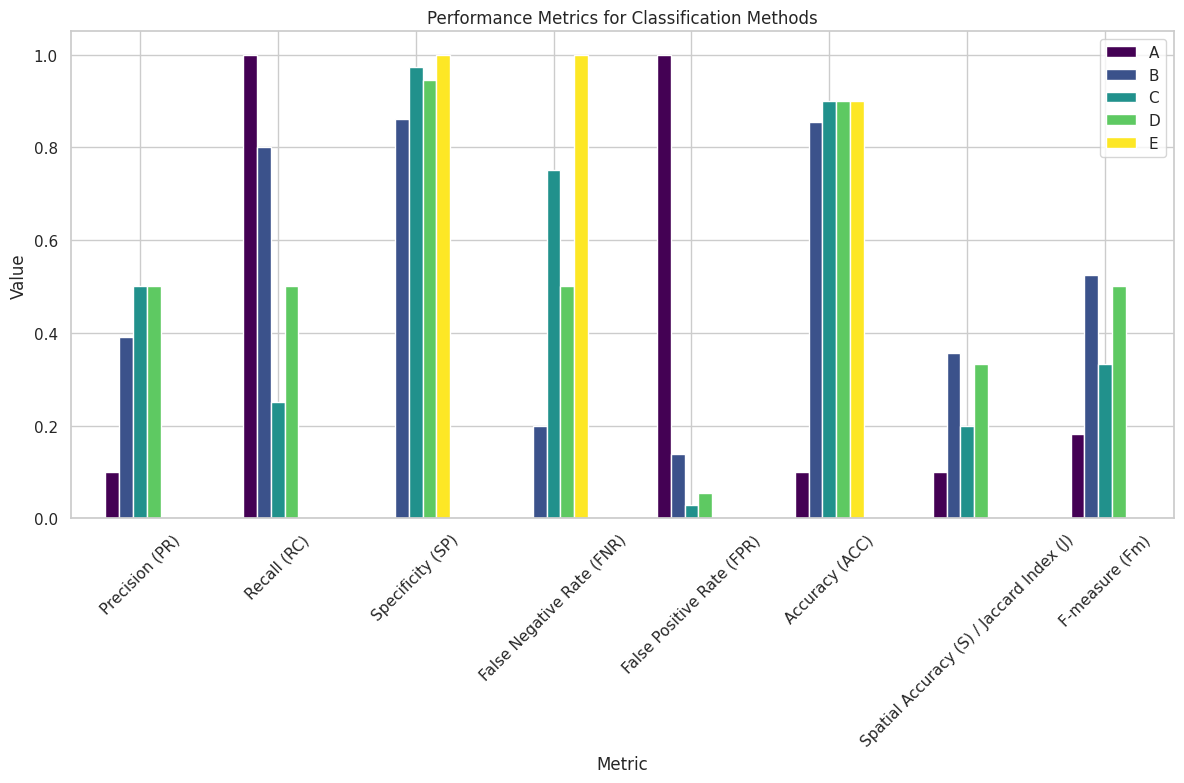

<ipython-input-1-a77caa995bc3>:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (metrics_df['False Negative Rate (FNR)'][i], metrics_df['False Positive Rate (FPR)'][i]), textcoords="offset points", xytext=(5,5), ha='right')


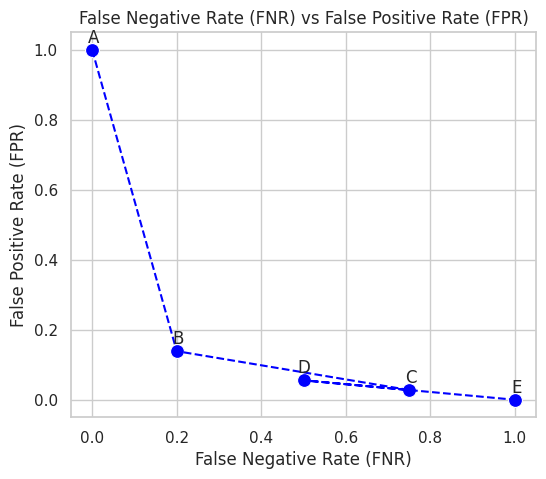

<ipython-input-1-a77caa995bc3>:111: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (metrics_df['Precision (PR)'][i], metrics_df['Recall (RC)'][i]), textcoords="offset points", xytext=(5,5), ha='right')


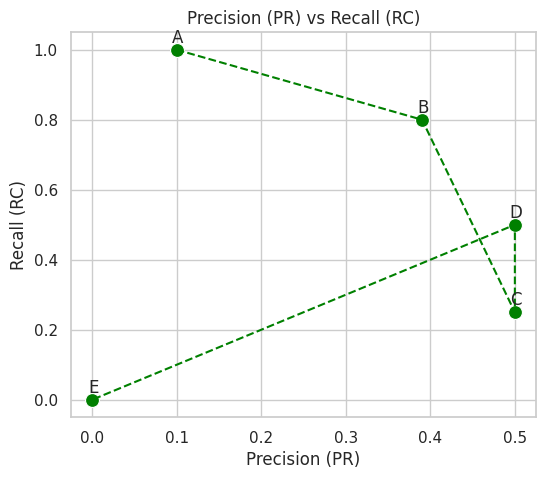

<ipython-input-1-a77caa995bc3>:123: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (metrics_df['Accuracy (ACC)'][i], metrics_df['F-measure (Fm)'][i]), textcoords="offset points", xytext=(5,5), ha='right')


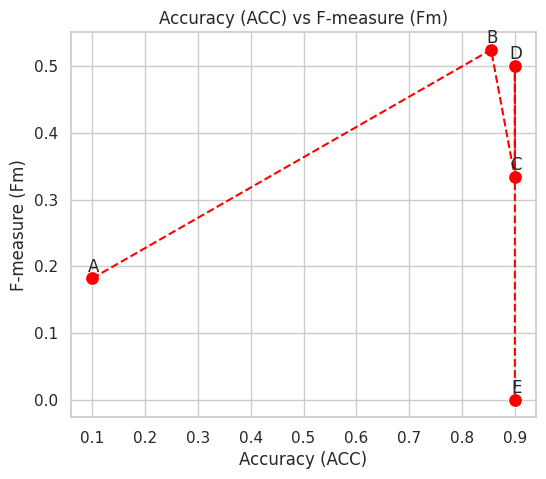

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the table of results for each method
metodos = {
    "A": {"tp": 100, "fp": 900, "fn": 0, "tn": 0},
    "B": {"tp": 80, "fp": 125, "fn": 20, "tn": 775},
    "C": {"tp": 25, "fp": 25, "fn": 75, "tn": 875},
    "D": {"tp": 50, "fp": 50, "fn": 50, "tn": 850},
    "E": {"tp": 0, "fp": 0, "fn": 100, "tn": 900}
}

# Function to calculate the metrics for each method
def calculate_metrics(TP, TN, FP, FN):
    """
    This function calculates the following classification metrics:
    1. Precision (PR)
    2. Recall (RC)
    3. Specificity (SP)
    4. False Negative Rate (FNR)
    5. False Positive Rate (FPR)
    6. Accuracy (ACC)
    7. Spatial Accuracy (S) / Jaccard Index (J)
    8. F-measure (Fm)
    """
    PR = TP / (TP + FP) if (TP + FP) != 0 else 0
    RC = TP / (TP + FN) if (TP + FN) != 0 else 0
    SP = TN / (TN + FP) if (TN + FP) != 0 else 0
    FNR = FN / (TP + FN) if (TP + FN) != 0 else 0
    FPR = FP / (FP + TN) if (FP + TN) != 0 else 0
    ACC = (TN + TP) / (TP + FN + FP + TN) if (TP + FN + FP + TN) != 0 else 0
    S = TP / (TP + FN + FP) if (TP + FN + FP) != 0 else 0  # Spatial Accuracy or Jaccard index
    Fm = (2 * PR * RC) / (PR + RC) if (PR + RC) != 0 else 0  # F-measure

    # Return metrics as a dictionary
    return {
        'Precision (PR)': PR,
        'Recall (RC)': RC,
        'Specificity (SP)': SP,
        'False Negative Rate (FNR)': FNR,
        'False Positive Rate (FPR)': FPR,
        'Accuracy (ACC)': ACC,
        'Spatial Accuracy (S) / Jaccard Index (J)': S,
        'F-measure (Fm)': Fm
    }

# Calculate metrics for each method
metrics_results = {}
for method, values in metodos.items():
    metrics_results[method] = calculate_metrics(values["tp"], values["tn"], values["fp"], values["fn"])

# Convert the results to a DataFrame for easy visualization
metrics_df = pd.DataFrame(metrics_results).T

# Display the metrics table
print("Metrics for each method:")
print(metrics_df)

# Plotting the performance metrics for each method
def plot_metrics(metrics_df):
    """
    This function plots the performance metrics comparison for each method.
    """
    # Transpose the DataFrame to make each method a row
    metrics_df = metrics_df.transpose()

    # Plot the metrics
    plt.figure(figsize=(12, 8))
    sns.set(style="whitegrid")

    # Plotting each metric as a bar plot
    metrics_df.plot(kind='bar', figsize=(12, 8), colormap='viridis')

    # Adding labels and title
    plt.title('Performance Metrics for Classification Methods')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Display the plot
    plt.show()

# Call the function to plot metrics
plot_metrics(metrics_df)

# Individual scatter plot functions for each metric comparison
def plot_fn_vs_fp(metrics_df):
    """ Plot FN vs FP with connecting lines for each method. """
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=metrics_df['False Negative Rate (FNR)'], y=metrics_df['False Positive Rate (FPR)'], s=100, color="blue")
    plt.plot(metrics_df['False Negative Rate (FNR)'], metrics_df['False Positive Rate (FPR)'], color="blue", linestyle="--", marker='o')
    plt.title("False Negative Rate (FNR) vs False Positive Rate (FPR)")
    plt.xlabel("False Negative Rate (FNR)")
    plt.ylabel("False Positive Rate (FPR)")
    for i, txt in enumerate(metrics_df.index):
        plt.annotate(txt, (metrics_df['False Negative Rate (FNR)'][i], metrics_df['False Positive Rate (FPR)'][i]), textcoords="offset points", xytext=(5,5), ha='right')
    plt.show()

def plot_pr_vs_rc(metrics_df):
    """ Plot Precision (PR) vs Recall (RC) with connecting lines for each method. """
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=metrics_df['Precision (PR)'], y=metrics_df['Recall (RC)'], s=100, color="green")
    plt.plot(metrics_df['Precision (PR)'], metrics_df['Recall (RC)'], color="green", linestyle="--", marker='o')
    plt.title("Precision (PR) vs Recall (RC)")
    plt.xlabel("Precision (PR)")
    plt.ylabel("Recall (RC)")
    for i, txt in enumerate(metrics_df.index):
        plt.annotate(txt, (metrics_df['Precision (PR)'][i], metrics_df['Recall (RC)'][i]), textcoords="offset points", xytext=(5,5), ha='right')
    plt.show()

def plot_acc_vs_fm(metrics_df):
    """ Plot Accuracy (ACC) vs F-measure (Fm) with connecting lines for each method. """
    plt.figure(figsize=(6, 5))
    sns.scatterplot(x=metrics_df['Accuracy (ACC)'], y=metrics_df['F-measure (Fm)'], s=100, color="red")
    plt.plot(metrics_df['Accuracy (ACC)'], metrics_df['F-measure (Fm)'], color="red", linestyle="--", marker='o')
    plt.title("Accuracy (ACC) vs F-measure (Fm)")
    plt.xlabel("Accuracy (ACC)")
    plt.ylabel("F-measure (Fm)")
    for i, txt in enumerate(metrics_df.index):
        plt.annotate(txt, (metrics_df['Accuracy (ACC)'][i], metrics_df['F-measure (Fm)'][i]), textcoords="offset points", xytext=(5,5), ha='right')
    plt.show()

# Call the functions to plot individual metric relationships with connecting lines
plot_fn_vs_fp(metrics_df)
plot_pr_vs_rc(metrics_df)
plot_acc_vs_fm(metrics_df)
